In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import datetime
from datetime import datetime
import matplotlib
import os
import ta
import random

In [4]:
df = pd.read_csv("data/binance_data.csv")

In [6]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(1087772, 8)
Index(['Unnamed: 0', 'datetime', 'open', 'high', 'low', 'close', 'volume',
       'symbol'],
      dtype='object')
Unnamed: 0     object
datetime      float64
open          float64
high          float64
low           float64
close         float64
volume        float64
symbol         object
dtype: object


In [9]:
print(df['symbol'].value_counts()) 
# 318 uniques in Binance 
# TODO change id to symbol in coinbase (or vice versa) and update unique count

BTCTUSD       3624
COTIBUSD      3624
C98BUSD       3624
QUICKBUSD     3624
ADXBUSD       3624
              ... 
PUNDIXBUSD     452
BTTTUSD        383
BTTBUSD        383
LUNCBUSD       176
USTCBUSD       176
Name: symbol, Length: 318, dtype: int64


In [11]:
# Figure out top ten cryptocurrencies by volume on average -
average_volume_ticker = df.groupby('symbol')['volume'].mean()
average_volume_ticker.reset_index()
average_volume_ticker.sort_values(ascending=False)[1:10]

symbol
SHIBBUSD    9.770912e+10
LUNABUSD    2.426371e+10
BTTCBUSD    1.902681e+10
XECBUSD     9.460844e+08
EPXBUSD     3.032042e+08
WINBUSD     1.611323e+08
MBLBUSD     6.375543e+07
USTCBUSD    6.018615e+07
AKROBUSD    5.861110e+07
Name: volume, dtype: float64

In [64]:
# Not the most valuable metric, want volume*price to see money moved by ticker
temp_df = df.copy()
# Close is probably a good proxy for average price for stable coins over hourly intervals
close_x_volume = df['close']*df['volume']
temp_df['product'] = close_x_volume.values
average_volume_ticker = temp_df.groupby('symbol')['product'].mean()
high_volume_tickers = (average_volume_ticker.sort_values(ascending=False)[0:9].index)
print(high_volume_tickers)


Index(['BTCBUSD', 'ETHBUSD', 'GMTBUSD', 'BNBBUSD', 'SOLBUSD', 'APEBUSD',
       'USDCBUSD', 'SHIBBUSD', 'ADABUSD'],
      dtype='object', name='symbol')


In [65]:
cur_list = high_volume_tickers

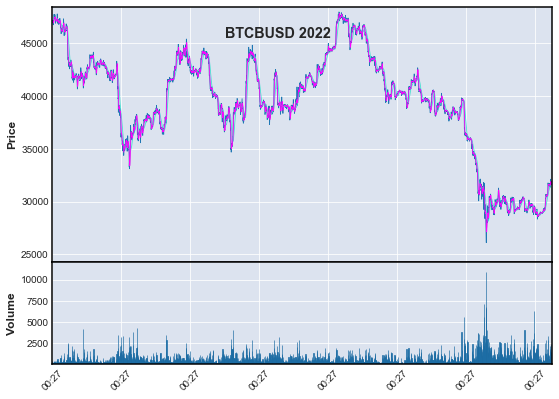

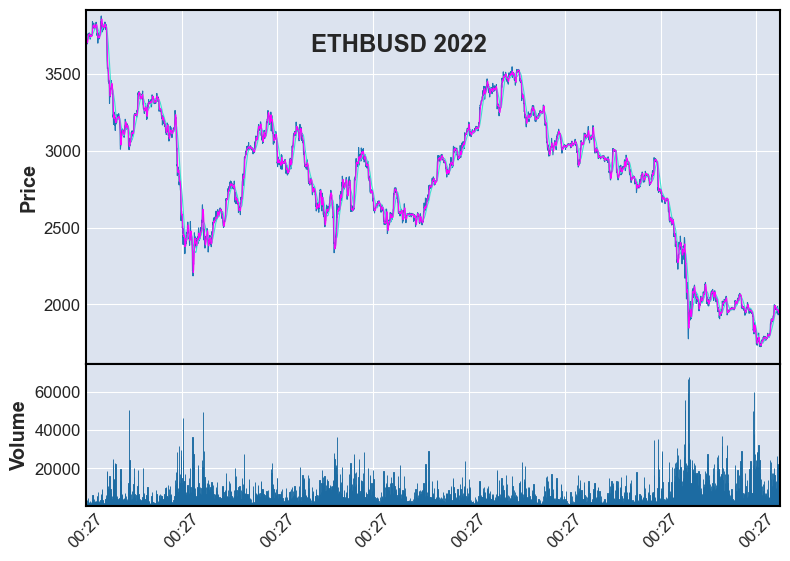

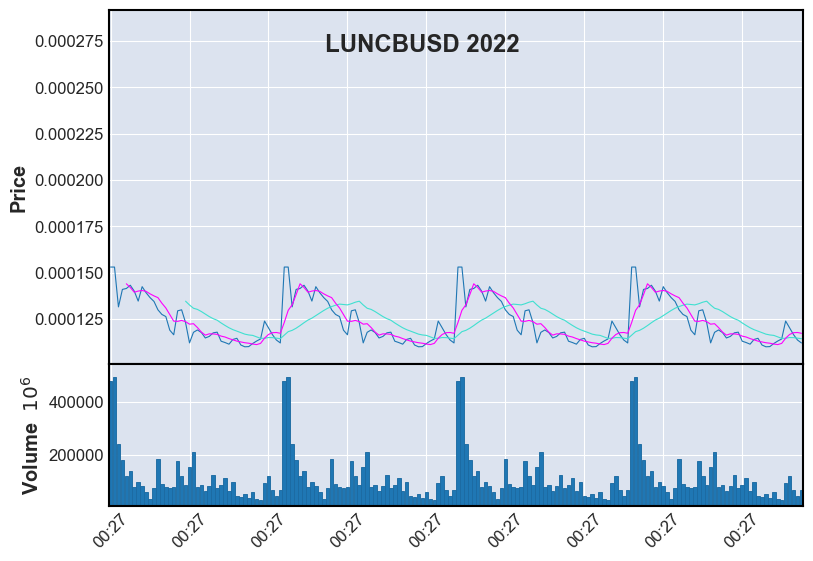

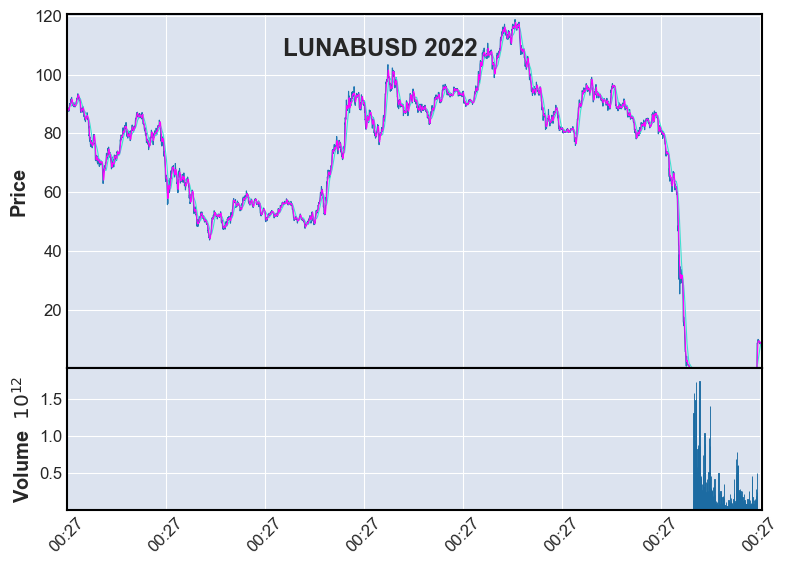

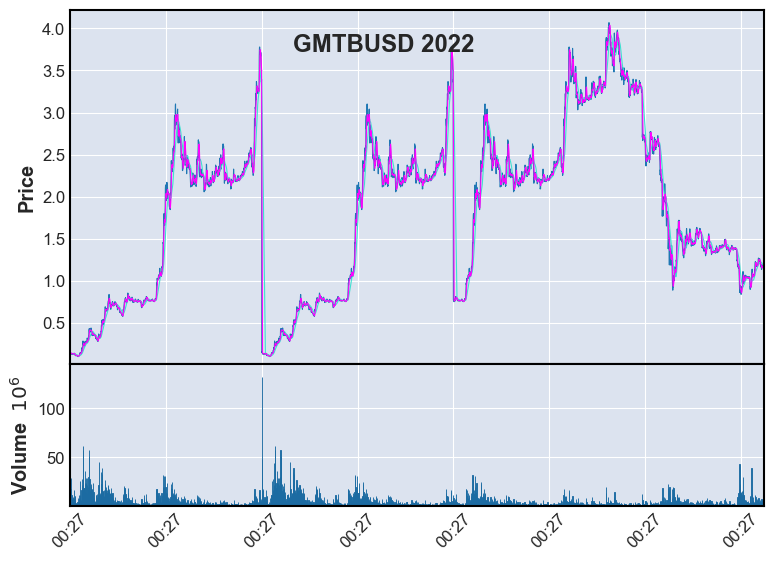

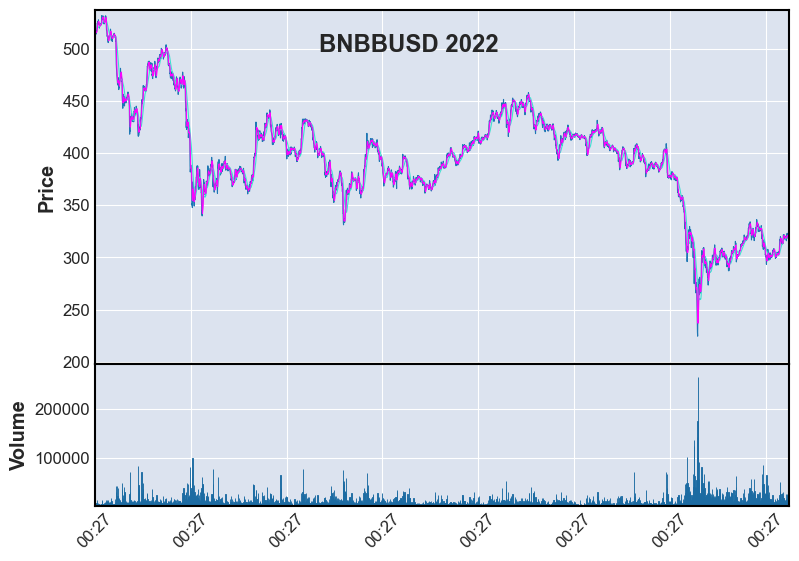

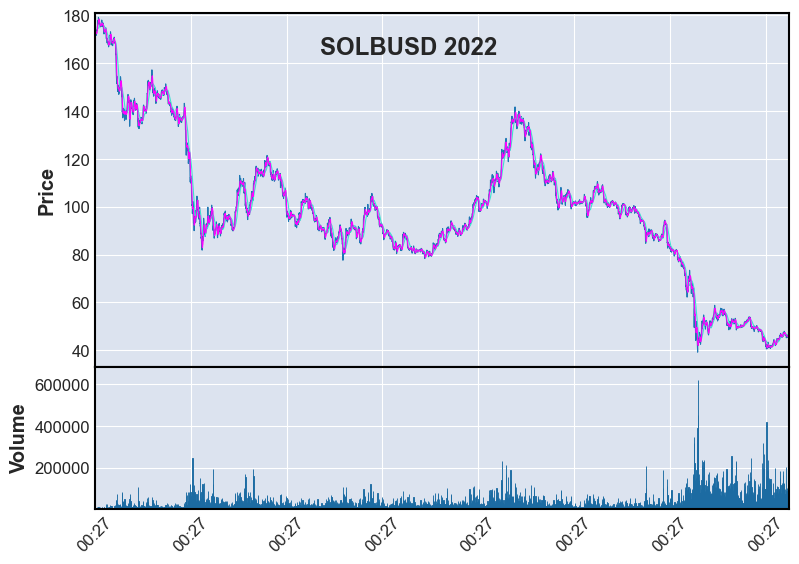

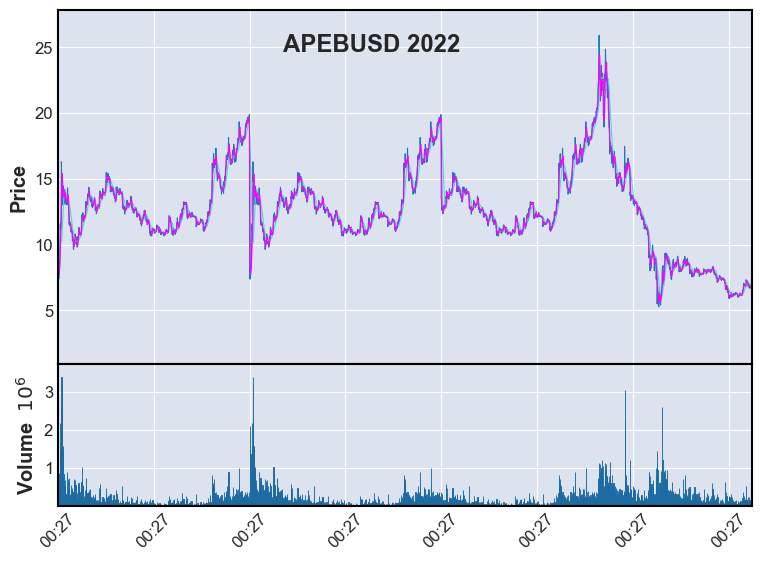

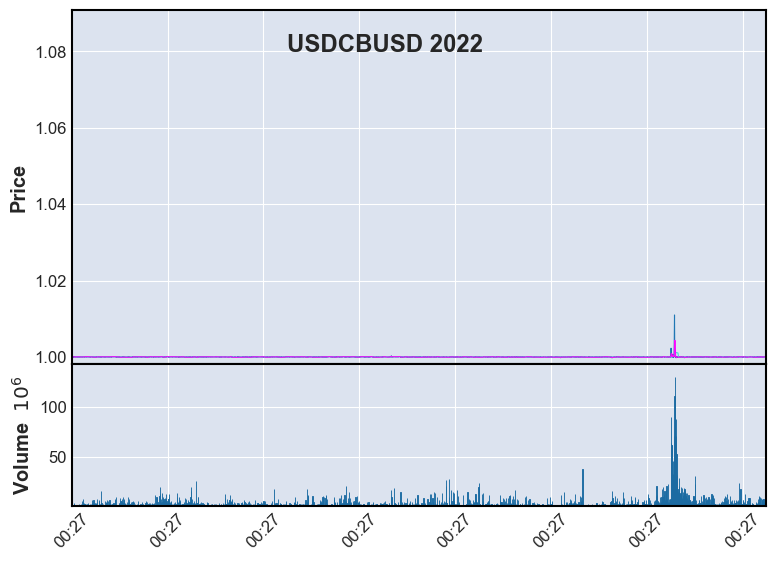

In [18]:
# line chart in 2022 for highest money movers

for cur in cur_list:
    df_cur = df[df['symbol'] == cur]
    df_cur = df_cur.drop(['symbol'], axis=1)
    df_cur['datetime'] = pd.to_datetime(df_cur['datetime'])
    df_cur.set_index('datetime', inplace=True)
    mpf.plot(df_cur, title=cur+' 2022', type='line', tight_layout=True, mav=(20, 5), volume=True)

In [24]:
# Look at rows per ticker
print("33 tickers with missing rows")
print(np.array((df.groupby('symbol').size().sort_values())))
new_ticker_list = np.array((df.groupby('symbol').size().sort_values()).index[33:])
print(new_ticker_list)

33 tickers with missing rows
[ 176  176  383  383  452  452  452  452  452  452  551  646  868 1103
 1103 1462 1630 1727 1822 2111 2159 2184 2404 2547 2973 2982 2982 2985
 3071 3310 3485 3489 3508 3624 3624 3624 3624 3624 3624 3624 3624 3624
 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624
 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624
 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624
 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624
 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624
 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624
 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624
 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624
 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624
 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624 3624
 3624 3624 3624 3624 3624 3624 3624 3624 3624 36

In [63]:
df = df[df['symbol'].isin(new_ticker_list)]
print(df['symbol'].value_counts()) 

BTCTUSD      3624
MLNBUSD      3624
QNTBUSD      3624
CLVBUSD      3624
C98BUSD      3624
             ... 
STRAXBUSD    3624
FORBUSD      3624
UNFIBUSD     3624
FRONTBUSD    3624
MULTIBUSD    3624
Name: symbol, Length: 285, dtype: int64


In [29]:
df.isna().sum().sum()
# No NaN's

0

In [31]:
# Create data frame with only close
close_df = pd.DataFrame(columns = new_ticker_list)
for ticker in new_ticker_list:
    ticker_df = df[df['symbol'] == ticker].copy()
    close_df[ticker] = np.array(ticker_df['close'])
print(close_df.head())

   PERPBUSD  PEOPLEBUSD  PLABUSD  PHABUSD  PONDBUSD  POLYBUSD  PAXGBUSD  \
0      8.83      0.1245    1.439   0.4332   0.06544    0.4856    1945.0   
1      8.80      0.1228    1.434   0.4333   0.06523    0.4843    1940.0   
2      8.84      0.1246    1.430   0.4318   0.06546    0.4856    1941.0   
3      8.83      0.1236    1.440   0.4308   0.06516    0.4870    1946.0   
4      8.86      0.1225    1.432   0.4263   0.06527    0.4832    1943.0   

   POWRBUSD  PROMBUSD  PSGBUSD  ...  EURBUSD  ETHBUSD  ETCBUSD  ERNBUSD  \
0    0.4219     12.19    15.33  ...    1.136  3735.87    34.40    8.968   
1    0.4203     12.23    15.29  ...    1.135  3712.57    34.29    9.007   
2    0.4191     12.26    15.27  ...    1.136  3715.76    34.44    9.178   
3    0.4191     12.23    15.26  ...    1.136  3721.84    34.43    9.150   
4    0.4193     12.22    15.21  ...    1.135  3718.75    34.35    9.143   

   EOSBUSD  ENSBUSD  ENJBUSD  ELFBUSD  ETHTUSD  ZRXBUSD  
0    3.082    39.71    2.603   0.3779  3

In [37]:
# sanity check, should come out to 3624
print(len(pd.unique(df['datetime'])))

3624


In [40]:
print(df.head())
df['datetime'] = df['datetime']- 18000000
df['datetime'] = pd.to_datetime(df['datetime'], unit = 'ms')
df.head()

            Unnamed: 0      datetime      open      high       low     close  \
0  2022-01-01 00:00:00  1.641013e+12  46709.76  47535.43  46680.58  47197.66   
1  2022-01-01 01:00:00  1.641017e+12  47159.20  47314.60  46968.65  46968.65   
2  2022-01-01 02:00:00  1.641020e+12  47016.82  47172.69  46919.68  47145.35   
3  2022-01-01 03:00:00  1.641024e+12  47210.38  47295.53  47087.27  47106.93   
4  2022-01-01 04:00:00  1.641028e+12  47095.05  47225.42  46946.06  47110.25   

    volume   symbol  
0  2.29999  BTCTUSD  
1  2.24871  BTCTUSD  
2  5.19031  BTCTUSD  
3  3.71817  BTCTUSD  
4  3.07901  BTCTUSD  


,Unnamed: 0,datetime,open,high,low,close,volume,symbol
0,2022-01-01 00:00:00,2022-01-01 00:00:00,46709.76,47535.43,46680.58,47197.66,2.29999,BTCTUSD
1,2022-01-01 01:00:00,2022-01-01 01:00:00,47159.20,47314.60,46968.65,46968.65,2.24871,BTCTUSD
2,2022-01-01 02:00:00,2022-01-01 02:00:00,47016.82,47172.69,46919.68,47145.35,5.19031,BTCTUSD
3,2022-01-01 03:00:00,2022-01-01 03:00:00,47210.38,47295.53,47087.27,47106.93,3.71817,BTCTUSD
4,2022-01-01 04:00:00,2022-01-01 04:00:00,47095.05,47225.42,46946.06,47110.25,3.07901,BTCTUSD


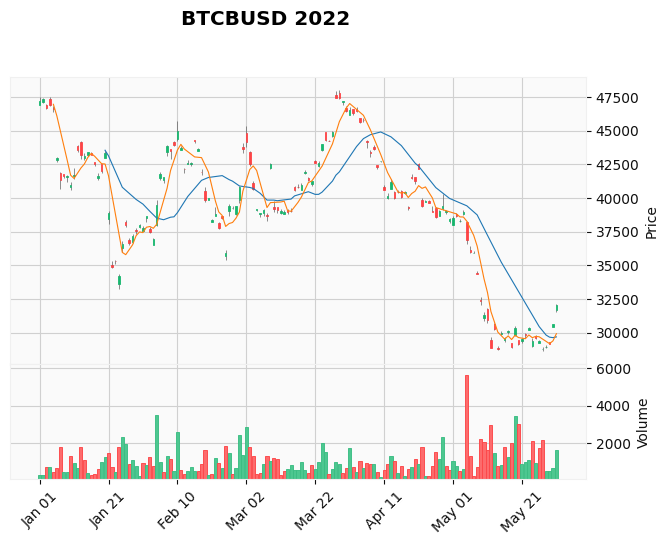

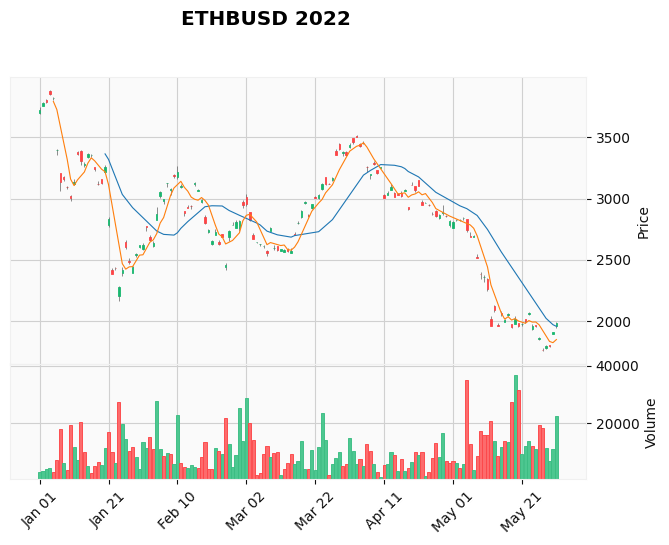

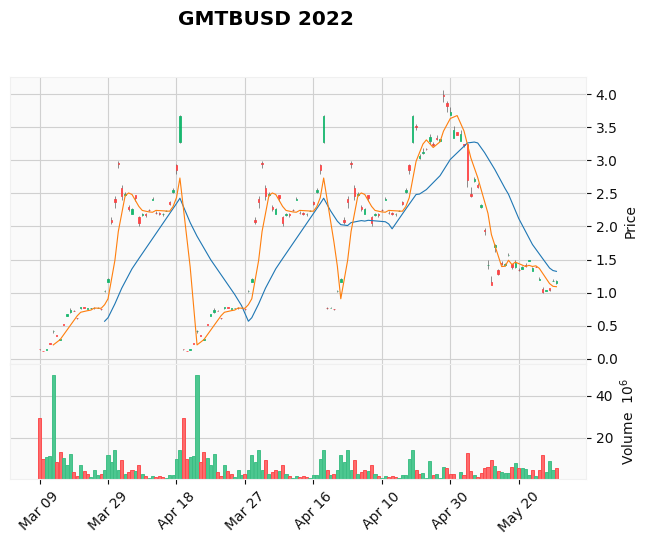

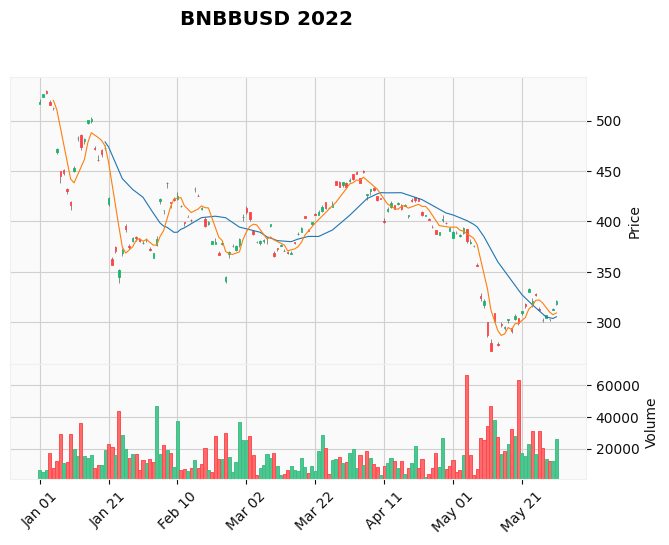

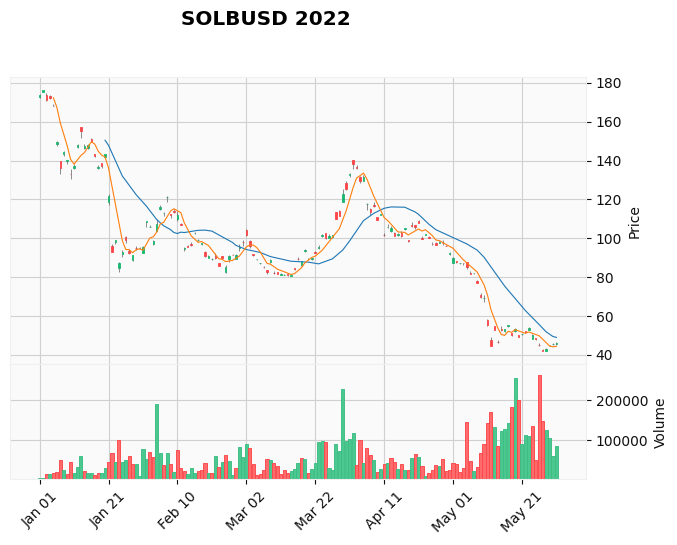

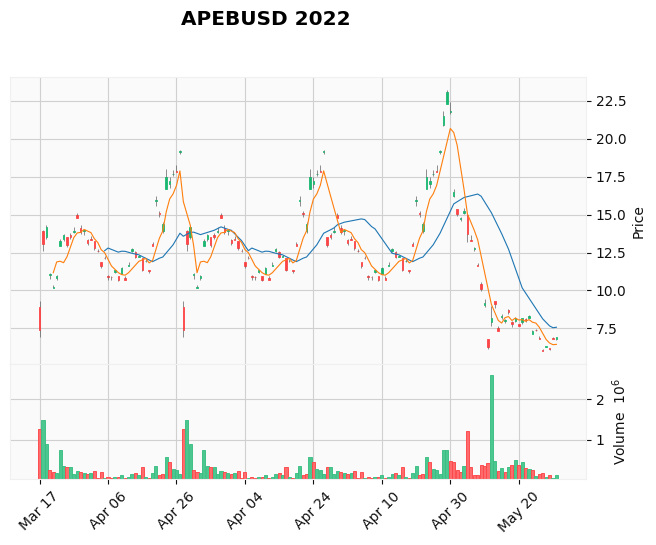

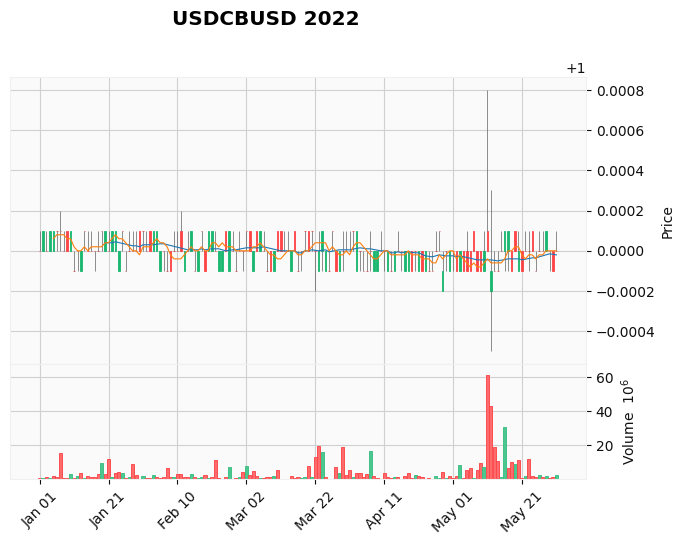

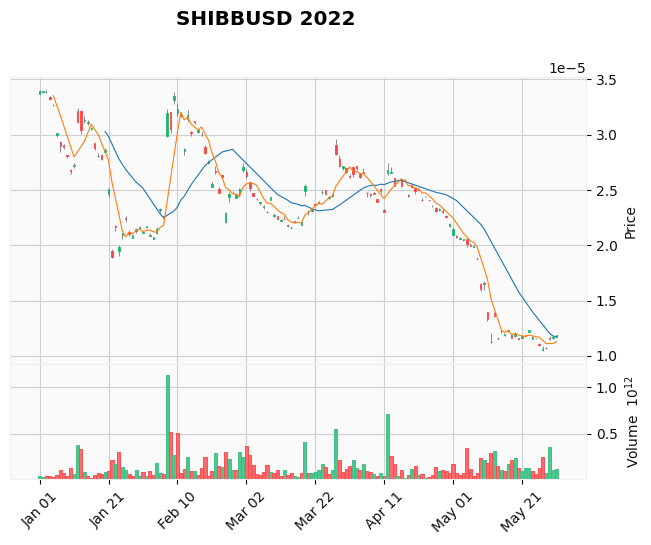

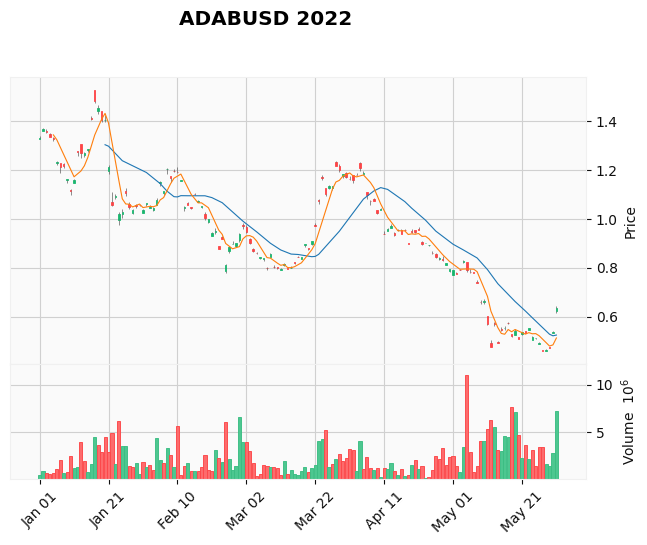

In [66]:
for cur in cur_list:
    df_cur = df[df['symbol'] == cur]
    df_cur = df_cur.drop(['symbol'], axis=1)
    df_cur['datetime'] = df_cur['datetime'].astype(str)
    df_cur = df_cur[[time.endswith('10:00:00') for time in df_cur.datetime]]
    df_cur['datetime'] = df_cur['datetime'].astype('datetime64[ns]')
    df_cur.loc[:, ('datetime')] = pd.to_datetime(list(df_cur['datetime'])).strftime('%Y-%m-%d')
    df_cur.index = pd.DatetimeIndex(df_cur['datetime'])
    df_cur.drop(['datetime'], axis=1)
    mpf.plot(df_cur, title=cur+' 2022', type='candle', mav=(20, 5), volume=True, style='yahoo')

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (9,).

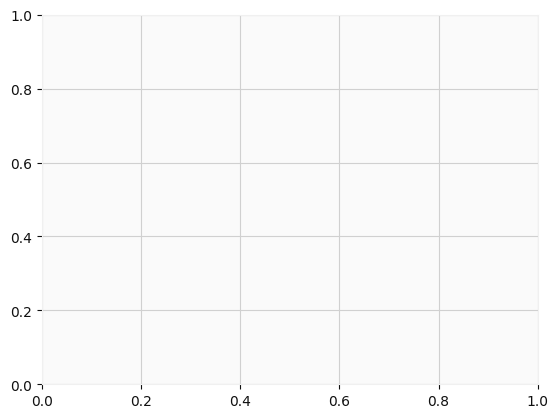

In [67]:
df_dir = []
for cur in cur_list:
    df_cur = df[df['symbol'] == cur]
    df_dir.append([np.sum(df_cur.close > df_cur.open), np.sum(df_cur.close <= df_cur.open)])

N = 5
up = [x[0] for x in df_dir]
down = [x[1] for x in df_dir]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot()
rects1 = ax.bar(ind, up, width, color='royalblue')
rects2 = ax.bar(ind+width, down, width, color='seagreen')

# add some
ax.set_ylabel('USD')
ax.set_title('Price Changes by Bitcoins')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('BTC-USD', 'SUKU-USD', 'COVAL-USD', 'ADA-USD', 'SUSHI-USD') )

ax.legend((rects1[0], rects2[0]), ('Up', 'Down'))

plt.show()
plt.close()

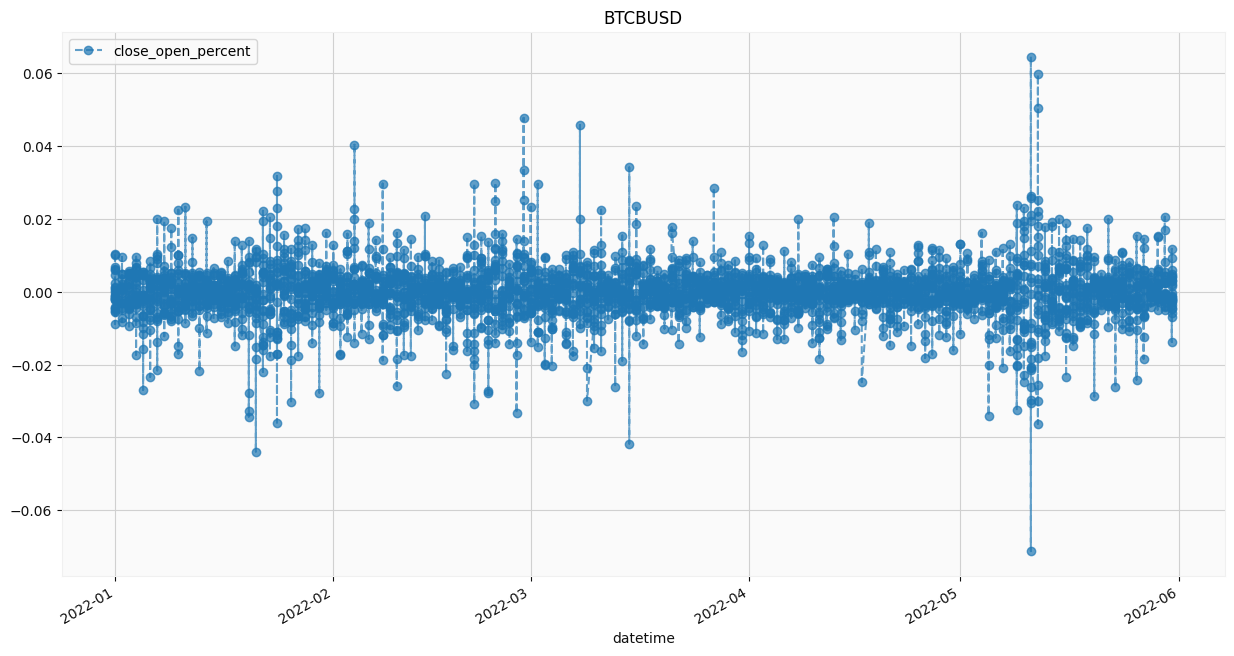

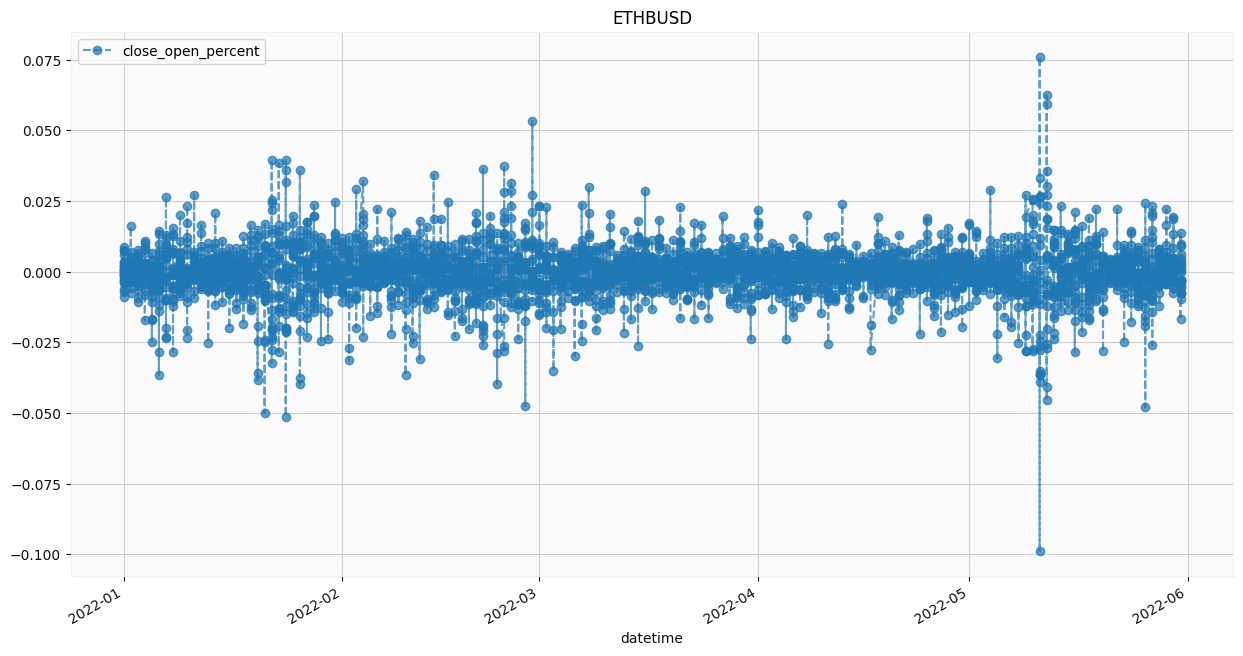

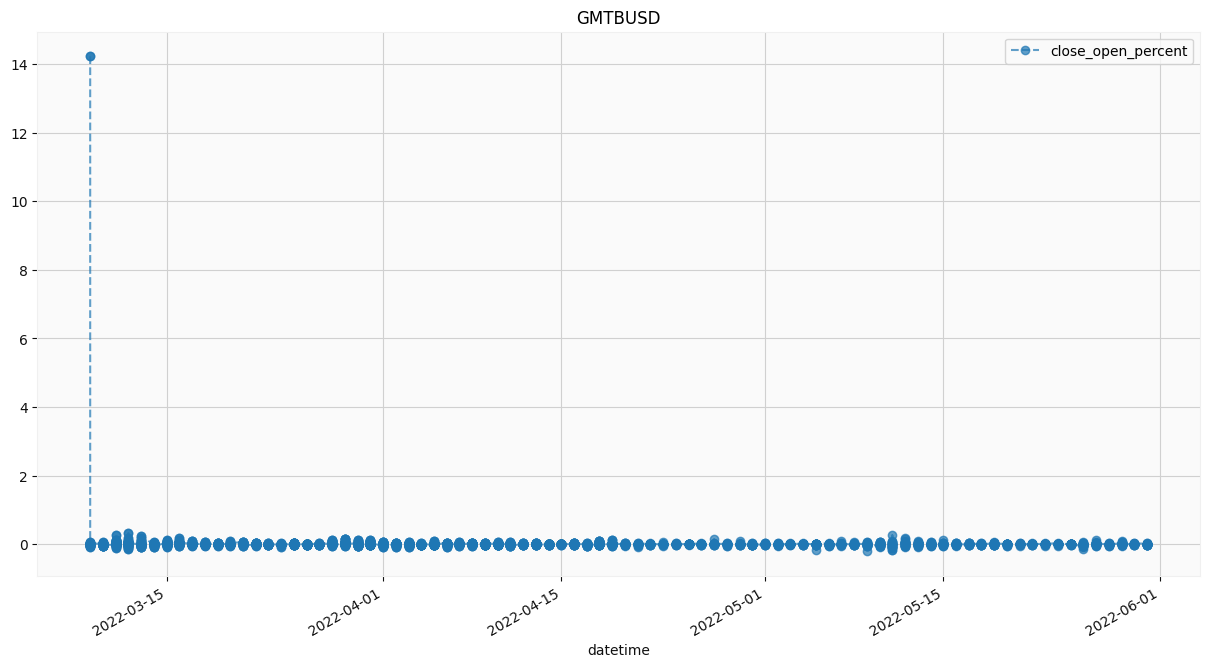

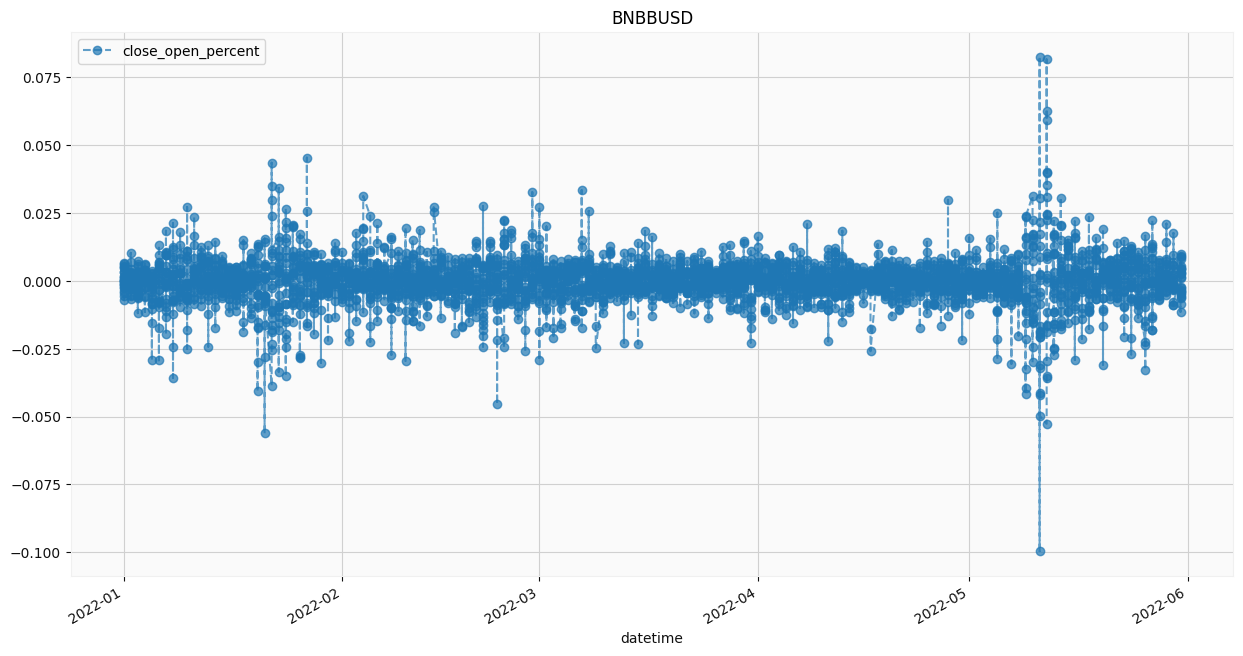

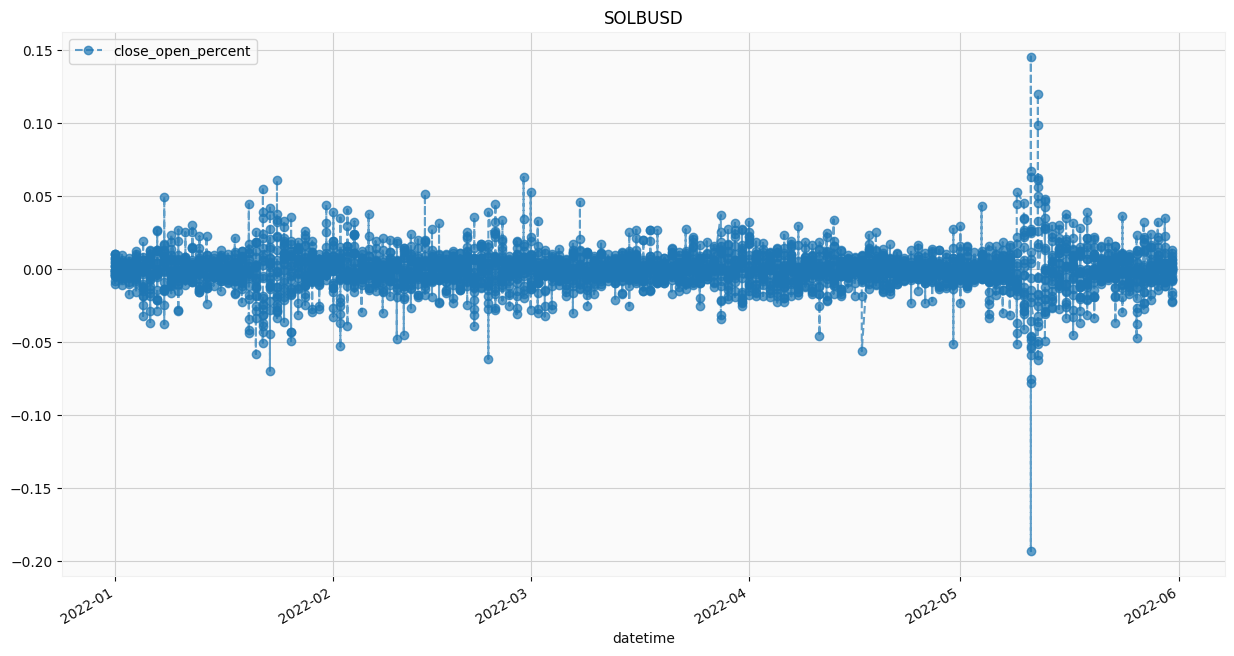

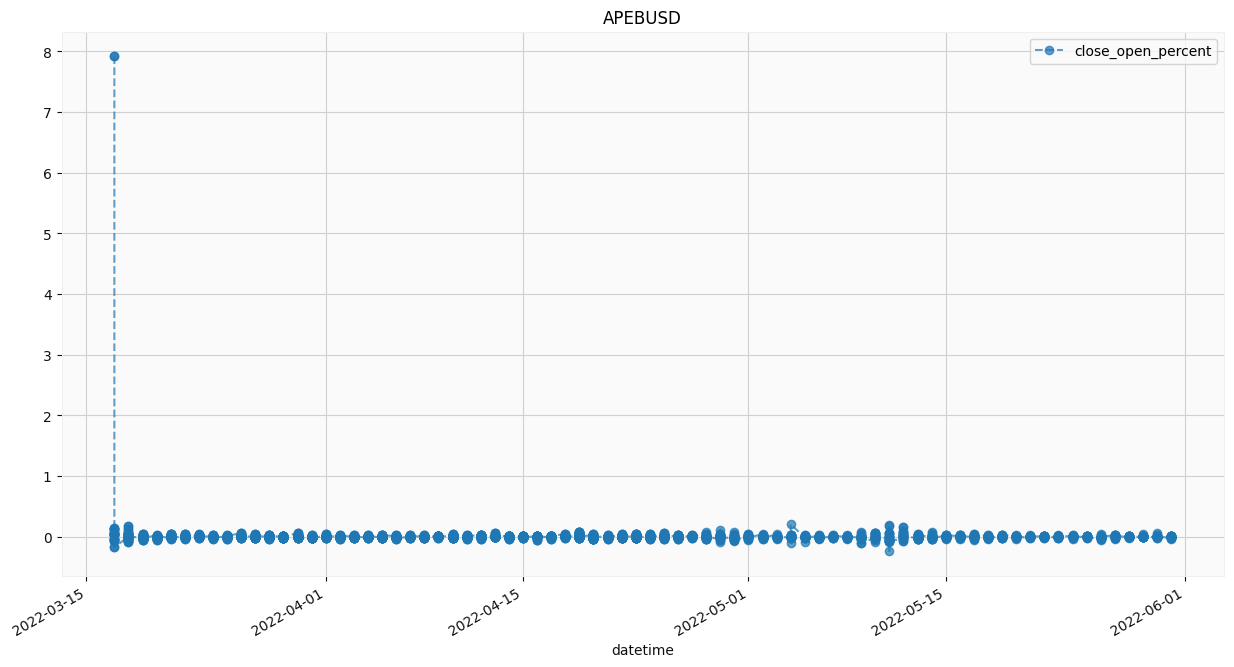

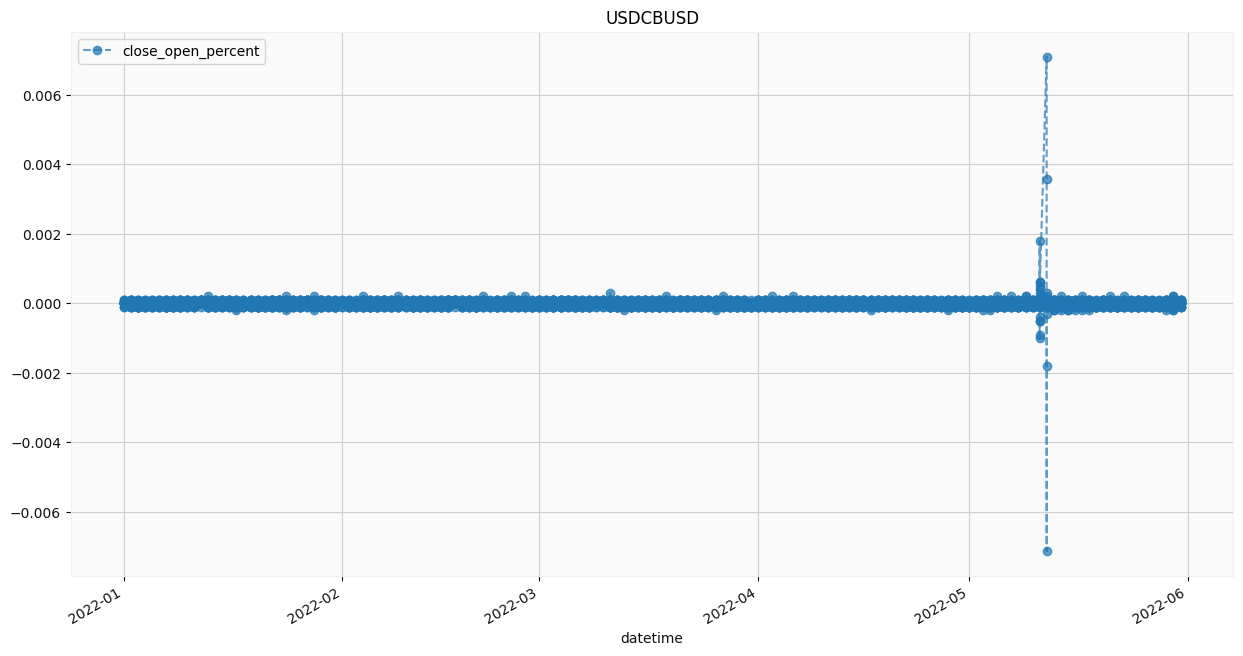

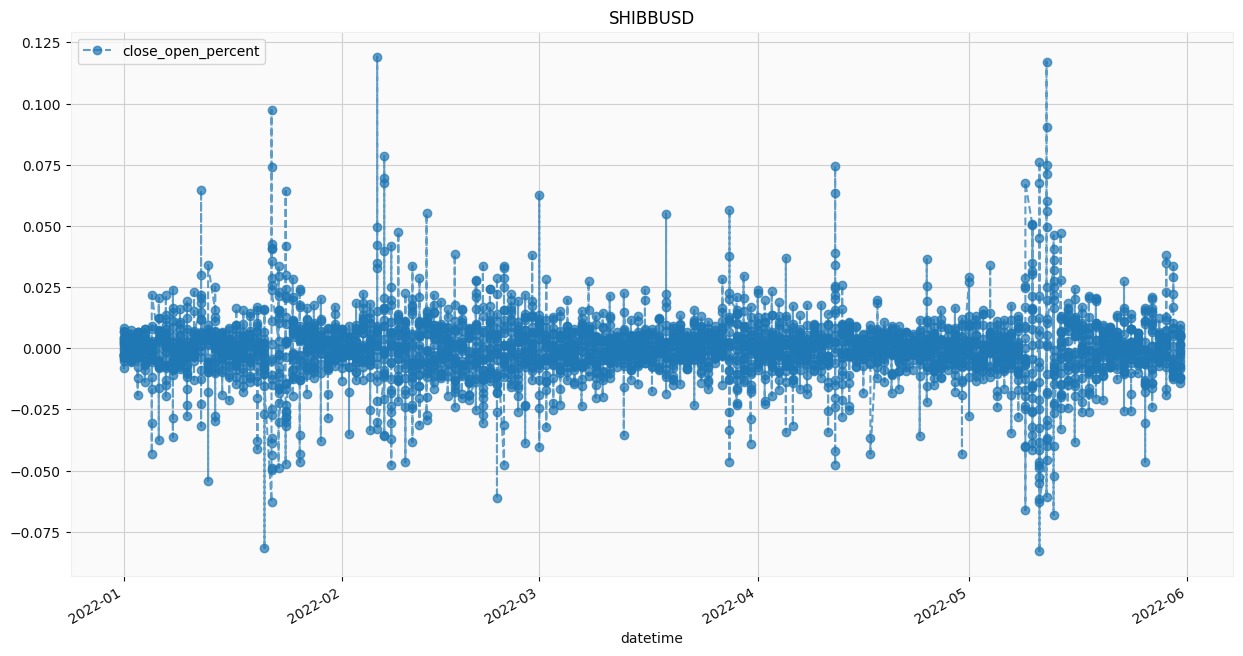

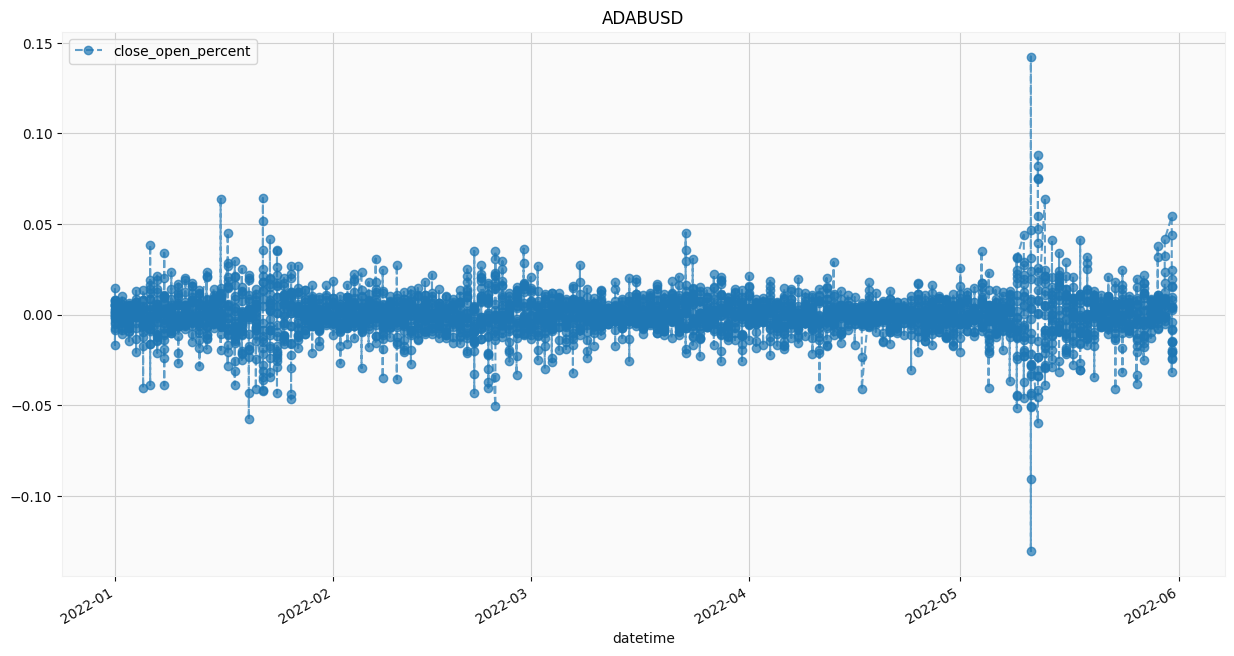

In [68]:
# Hourly percent changes
for cur in cur_list:
    df_cur = df[df['symbol'] == cur].copy()
    df_cur['close_open_percent'] = (df_cur.close - df_cur.open)/df_cur.open
    df_cur.loc[:, ('datetime')] = pd.to_datetime(list(df_cur['datetime'])).strftime('%Y-%m-%d')
    df_cur.index = pd.DatetimeIndex(df_cur['datetime'])
    plt.figure(figsize=(15, 8))
    plt.grid()
    df_cur['close_open_percent'].plot(legend=True,linestyle='--',marker='o',ms=6, alpha=0.7)
    plt.title(cur)
    plt.show()
    plt.close() 

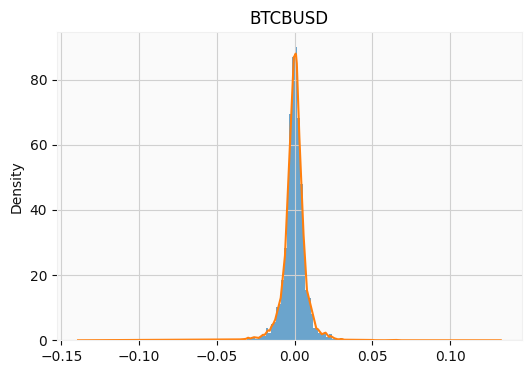

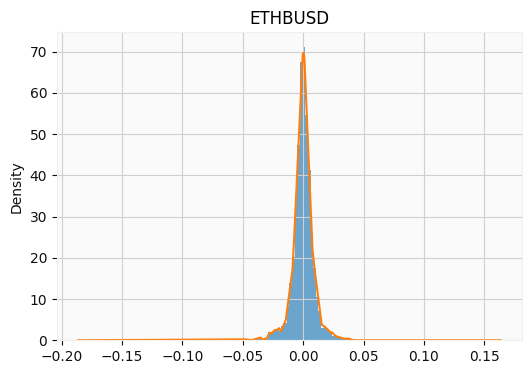

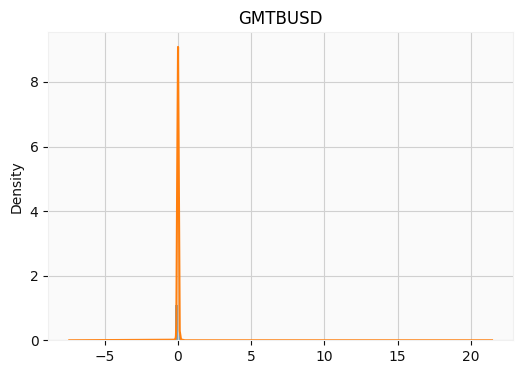

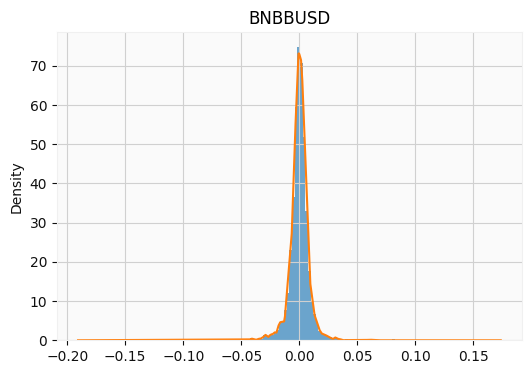

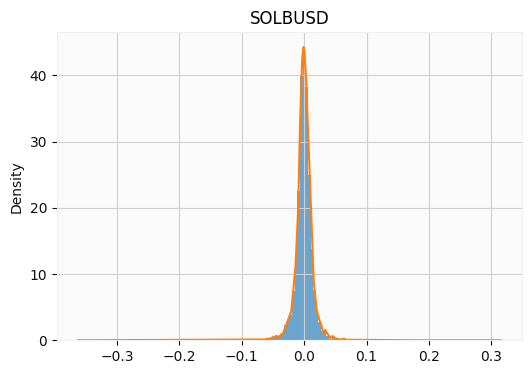

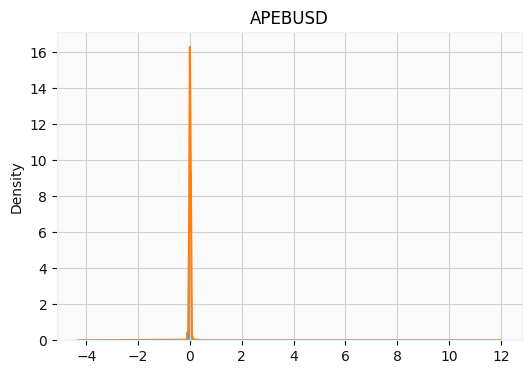

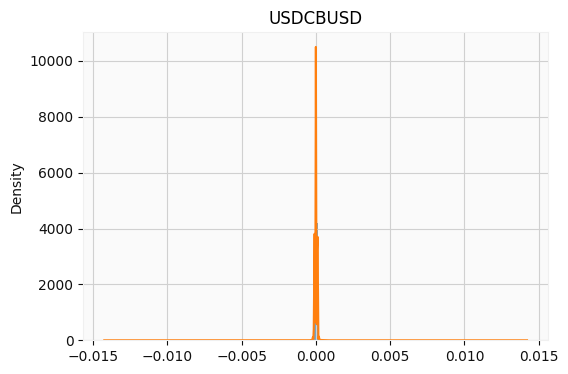

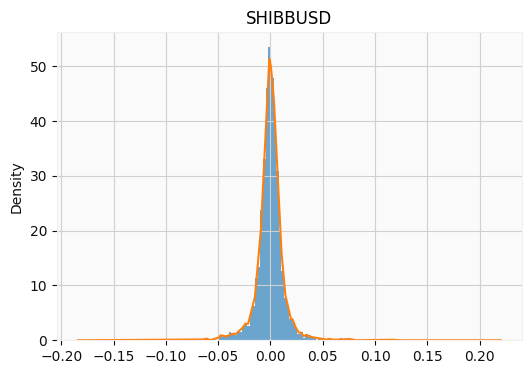

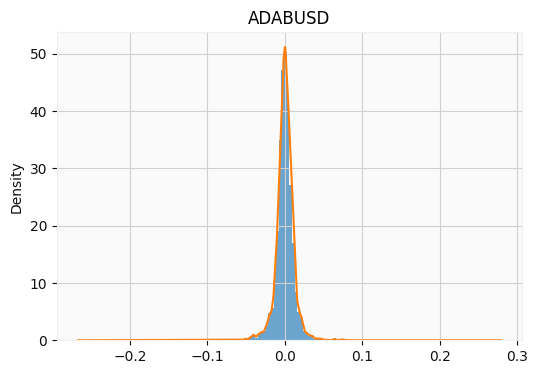

In [69]:
# Hourly percent changes: distribution
for cur in cur_list:
    df_cur = df[df['symbol'] == cur].copy()
    df_cur['close_open_percent'] = (df_cur.close - df_cur.open)/df_cur.open
    plt.figure(figsize=(6, 4))
    df_cur['close_open_percent'].plot(kind="hist",density=True,alpha=0.65, bins = 80)
    df_cur['close_open_percent'].plot(kind="kde", bw_method=0.1)
    plt.title(cur)
    plt.show()
    plt.close()

In [70]:
d = {cur: df.loc[df['symbol']==cur, ('close')].values for cur in cur_list}
df_close = pd.DataFrame(data=d)
df_close['datetime'] = df.datetime.copy()
df_close['datetime'] = pd.to_datetime(df_close['datetime'])
df_close.set_index('datetime', inplace=True)
df_close.head()

,BTCBUSD,ETHBUSD,GMTBUSD,BNBBUSD,SOLBUSD,APEBUSD,USDCBUSD,SHIBBUSD,ADABUSD
datetime,,,,,,,,,
2022-01-01 00:00:00,47191.72,3735.87,0.15238,518.2,173.27,8.9210,1.0000,0.000034,1.327
2022-01-01 01:00:00,46983.38,3712.57,0.15741,515.1,172.45,7.3800,1.0000,0.000034,1.316
2022-01-01 02:00:00,47202.17,3715.76,0.14909,515.9,173.11,8.2701,1.0001,0.000034,1.325
2022-01-01 03:00:00,47122.84,3721.84,0.14417,515.9,172.90,7.9481,1.0000,0.000034,1.326
2022-01-01 04:00:00,47140.29,3718.75,0.13201,515.7,172.78,7.3994,1.0001,0.000034,1.327


<AxesSubplot:>

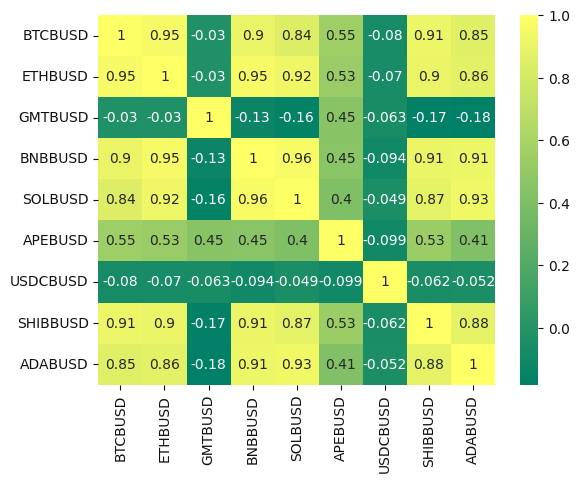

In [71]:
import seaborn as sns
sns.heatmap(df_close.corr(), annot=True, cmap='summer')

In [73]:
d = {cur: list((df[df['symbol']==cur].close - df[df['symbol']==cur].open)/df[df['symbol']==cur].open) for cur in cur_list}
df_percent = pd.DataFrame(data=d)
df_percent['datetime'] = df.datetime.copy()
df_percent['datetime'] = pd.to_datetime(df_percent['datetime'])
df_percent.set_index('datetime', inplace=True)
df_percent.head()

,BTCBUSD,ETHBUSD,GMTBUSD,BNBBUSD,SOLBUSD,APEBUSD,USDCBUSD,SHIBBUSD,ADABUSD
datetime,,,,,,,,,
2022-01-01 00:00:00,0.010297,0.007595,14.222777,0.006409,0.010380,7.920108,0.0000,0.006573,0.014526
2022-01-01 01:00:00,-0.004521,-0.006239,0.033010,-0.005790,-0.004847,-0.172089,0.0000,-0.000594,-0.008289
2022-01-01 02:00:00,0.004657,0.000859,-0.052856,0.001553,0.004060,0.119821,0.0001,0.003564,0.006074
2022-01-01 03:00:00,-0.001672,0.001631,-0.031181,0.000000,-0.001674,-0.037504,-0.0001,-0.002960,0.001511
2022-01-01 04:00:00,0.000370,-0.000828,-0.083264,-0.000581,-0.000810,-0.068309,0.0001,0.001782,0.000000


<AxesSubplot:>

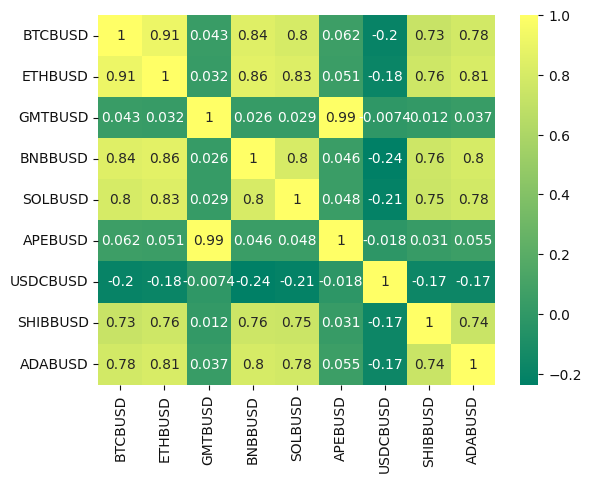

In [74]:
sns.heatmap(df_percent.corr(), annot=True, cmap='summer')

In [82]:
print(df.dtypes)
df['datetime'] = df['datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))
print(df.dtypes)

Unnamed: 0            object
datetime      datetime64[ns]
open                 float64
high                 float64
low                  float64
close                float64
volume               float64
symbol                object
dtype: object
Unnamed: 0     object
datetime       object
open          float64
high          float64
low           float64
close         float64
volume        float64
symbol         object
dtype: object


In [98]:
print(df.head())
master_ticker_list = np.unique(df['symbol'].values)
# master_ticker_list = master_ticker_list
print(master_ticker_list)
print(df.datetime.values)


            Unnamed: 0    datetime      open      high       low     close  \
0  2022-01-01 00:00:00  2022-01-01  46709.76  47535.43  46680.58  47197.66   
1  2022-01-01 01:00:00  2022-01-01  47159.20  47314.60  46968.65  46968.65   
2  2022-01-01 02:00:00  2022-01-01  47016.82  47172.69  46919.68  47145.35   
3  2022-01-01 03:00:00  2022-01-01  47210.38  47295.53  47087.27  47106.93   
4  2022-01-01 04:00:00  2022-01-01  47095.05  47225.42  46946.06  47110.25   

    volume   symbol  
0  2.29999  BTCTUSD  
1  2.24871  BTCTUSD  
2  5.19031  BTCTUSD  
3  3.71817  BTCTUSD  
4  3.07901  BTCTUSD  
['1INCHBUSD' 'AAVEBUSD' 'ACABUSD' 'ACHBUSD' 'ACMBUSD' 'ADABUSD' 'ADATUSD'
 'ADXBUSD' 'AERGOBUSD' 'AGLDBUSD' 'ALCXBUSD' 'ALGOBUSD' 'ALICEBUSD'
 'ALPACABUSD' 'ALPHABUSD' 'ALPINEBUSD' 'AMPBUSD' 'ANCBUSD' 'ANKRBUSD'
 'ANTBUSD' 'APEBUSD' 'API3BUSD' 'ARBUSD' 'ARPABUSD' 'ASTRBUSD' 'ATABUSD'
 'ATMBUSD' 'ATOMBUSD' 'AUCTIONBUSD' 'AUDBUSD' 'AUDIOBUSD' 'AUTOBUSD'
 'AVABUSD' 'AVAXBUSD' 'AXSBUSD' 'BADGERBUSD' 

In [100]:

quotient_numerator = 0
quotient_denominator = 0

quotient_numerator_close = 0
quotient_denominator_close = 0

for ticker in master_ticker_list:
    ticker_temp_df = df[df['symbol']==ticker].copy()
    ticker_temp_df.index = pd.DatetimeIndex(ticker_temp_df['datetime'])
    for i in range(len(ticker_temp_df)-2):
        if (ticker_temp_df.low.values[i+2] / ticker_temp_df.high.values[i]>1.001):
            quotient_numerator = quotient_numerator + 1
            quotient_denominator = quotient_denominator + 1
        else:
            quotient_denominator = quotient_denominator + 1
    for i in range(len(ticker_temp_df)-2):
        if (ticker_temp_df.close.values[i+1] / ticker_temp_df.close.values[i]>1.001):
            quotient_numerator_close = quotient_numerator_close + 1
            quotient_denominator_close = quotient_denominator_close + 1
        else:
            quotient_denominator_close = quotient_denominator_close + 1

print(quotient_numerator/quotient_denominator, "useful trades we could capitalize on")
print(quotient_numerator_close/quotient_denominator_close, "useful trades with closing prices")

    

0.1003797456091914 useful trades we could capitalize on
0.43627829928216455 useful trades with closing prices


In [105]:
andras_array = []
close_array = []

for ticker in master_ticker_list:
    ticker_temp_df = df[df['symbol']==ticker].copy()
    ticker_temp_df.index = pd.DatetimeInlsdex(ticker_temp_df['datetime'])
    for i in range(len(ticker_temp_df)-2):
        andras_array.append(ticker_temp_df.low.values[i+2] / ticker_temp_df.high.values[i])
    for i in range(len(ticker_temp_df)-2):
        close_array.append(ticker_temp_df.close.values[i+1] / ticker_temp_df.close.values[i])

np.histogram(andras_array)
np.histogram(close_array)

(array([      3,       4,     128, 1028716,    3350,      52,       8,
              4,       3,       2]),
 array([0.04489899, 0.30163763, 0.55837626, 0.8151149 , 1.07185353,
        1.32859217, 1.5853308 , 1.84206943, 2.09880807, 2.3555467 ,
        2.61228534]))

[]

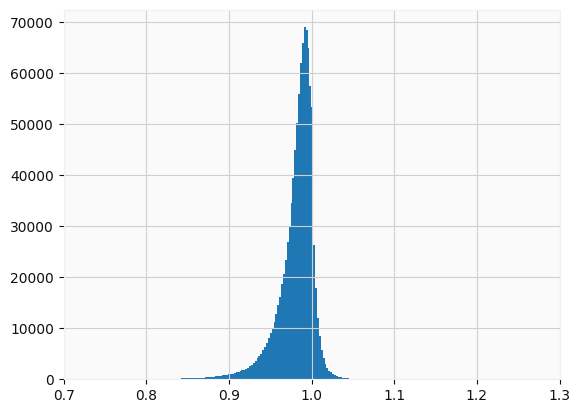

In [113]:
plt.hist(andras_array, bins = 1000)
plt.xlim(0.7, 1.3)
plt.plot()

[]

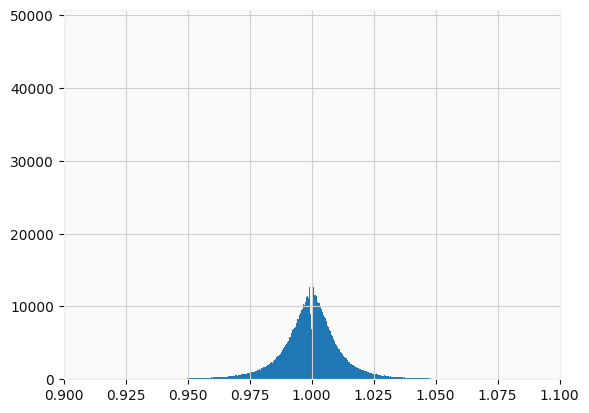

In [116]:
plt.hist(close_array, bins = 10000)
plt.xlim(0.9, 1.1)
plt.plot()

In [101]:
import random
def flip_biased(p):
    return random.random() < p

In [103]:
quotient_numerator = 0
quotient_denominator = 0
Andras_profit = 0
quotient_numerator_close = 0
quotient_denominator_close = 0
Close_profit = 0

for ticker in master_ticker_list:
    ticker_temp_df = df[df['symbol']==ticker].copy()
    ticker_temp_df.index = pd.DatetimeIndex(ticker_temp_df['datetime'])
    for i in range(len(ticker_temp_df)-2):
        if (ticker_temp_df.low.values[i+2] / ticker_temp_df.high.values[i]) > 1.001:
            quotient_numerator = quotient_numerator + 1
            quotient_denominator = quotient_denominator + 1
            if flip_biased(0.55) == True:
                Andras_profit = Andras_profit + ticker_temp_df.low.values[i+2] - ticker_temp_df.high.values[i] - 0.001*ticker_temp_df.high.values[i]
        else:
            quotient_denominator = quotient_denominator + 1
    for i in range(len(ticker_temp_df)-2):
        if (ticker_temp_df.close.values[i+1] / ticker_temp_df.close.values[i]) > 1.001:
            quotient_numerator_close = quotient_numerator_close + 1
            quotient_denominator_close = quotient_denominator_close + 1
            if flip_biased(0.60) == True:
                Close_profit = Close_profit + ticker_temp_df.close.values[i+1] - ticker_temp_df.close.values[i] - 0.001*ticker_temp_df.close.values[i]
        else:
            quotient_denominator_close = quotient_denominator_close + 1

print(quotient_numerator/quotient_denominator, "useful trades we could capitalize on")
print(quotient_numerator_close/quotient_denominator_close, "useful trades with closing prices")
print("Andras profit", Andras_profit)
print("Close profit", Close_profit)

0.1003797456091914 useful trades we could capitalize on
0.43627829928216455 useful trades with closing prices
Andras profit 100181.8553169934
Close profit 563560.5861668556


In [ ]:
for cur in cur_list:
    df_cur = df[df['symbol'] == cur].copy()
    df_cur['close_open_percent'] = (df_cur.close - df_cur.open)/df_cur.open
    df_cur.loc[:, ('datetime')] = pd.to_datetime(list(df_cur['datetime'])).strftime('%Y-%m-%d')
    df_cur.index = pd.DatetimeIndex(df_cur['datetime'])
    plt.figure(figsize=(15, 8))
    plt.grid()
    df_cur['close_open_percent'].plot(legend=True,linestyle='--',marker='o',ms=6, alpha=0.7)
    plt.title(cur)
    plt.show()
    plt.close() 